# Regresión Lineal Múltiple

- [Regresión Lineal Múltiple](#Regresión-Lineal-Múltiple)
- [Términos de Interacción](#Términos-de-Interacción)
- [Transformaciones No-lineales de los Predictores](#Transformaciones-No-lineales-de-los-Predictores)
- [Predictores Cualitativos](#Predictores-Cualitativos)


In [1]:
# realizar la importación y configuración

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston # boston data set is part of sklearn
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
# plt.style.use('ggplot') # emulate pretty r-style plots

##  Regresión Lineal Múltiple

Se seguirán utilizando los datos Boston que son parte del módulo `sklearn`.

In [2]:
# Caga de los datos de Boston
boston = load_boston()

#Transformamos los datos en un dataframe para el análisis

# combinamos los predictores y las respuestas para un dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# ahora obtenemos los nombres de las columnas del dataframe
col_names = np.append(boston.feature_names, 'MEDV')

# creamos el data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Regresión Lineal Múltiple

Para ajustar un modelo de regresión lineal múltiple usando mínimos cuadrados, usamos de nuevo el módulo statsmodels. La sintaxis `smf.ols('y~x1+x2+x3, data)` se usa para ajustar un modelo con tres predictores, `x1`, `x2`, and `x3`. La función `summary()` ahora despliega los coeficientes de regresión para todos los predictores.

In [6]:
#Modelo
# y = a + b1*x1 + b2*x2
lm_fit = smf.ols('MEDV~LSTAT+AGE', boston_df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           2.98e-88
Time:                        12:45:36   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

El conjunto de datos `Boston` contiene 13 variables, y para facilitar la escriturade todas las variables para la regresión usando todos los predictores, podemos usar el siguiente atajo:

In [6]:
'+'.join(preds)

'CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [5]:
preds = list(boston_df.columns)
preds.remove('MEDV')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

'MEDV~CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [8]:
lm_ins = smf.ols(my_formula, boston_df)
lm_fit = lm_ins.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        12:45:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can access the individual components of a summary object by name.

In [9]:
# This gives us the R^2
lm_fit.rsquared

0.7406426641094095

In [10]:
# This gives us the RSE
np.sqrt(lm_fit.mse_resid)

4.745298181699631

statsmodels también se puede usar para calcular factores de inflación de la varianza (VIF). La mayoría de los VIF’s son bajos a moderados para estos datos.

Una recomendación es que el VIF sea mayor que 5, luego, la variable explicativa es altamente colineal con otras variables explicativas, y los estimadores de los parámetros tendrán errores estándar grandes debido a esto.

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm_ins = smf.ols(my_formula, boston_df)

# exog is the predictor matrix of the model
VIFs = [(predictor, variance_inflation_factor(lm_ins.exog, idx)) 
        for (idx, predictor) in enumerate(lm_ins.exog_names)]

print('Variance Inflation Factors')
for tup in VIFs:
    print('{:10}'.format(tup[0]), '{:.3f}'.format(tup[1]))

Variance Inflation Factors
Intercept  585.265
CRIM       1.792
ZN         2.299
INDUS      3.992
CHAS       1.074
NOX        4.394
RM         1.934
AGE        3.101
DIS        3.956
RAD        7.484
TAX        9.009
PTRATIO    1.799
B          1.349
LSTAT      2.941


¿Qué tal si queremos hacer una regersión usando todas las variables excepto una? Por ejemplo, en la salida de regresión arriba, age tiene alto p-valor. Así que podríamos correr una regresión excluyendo este predictor. La siguiente sintáxis devuelve una regresión usando todos los predictores excepto age.

In [13]:
preds = list(boston_df.columns)
preds.remove('MEDV')
preds.remove('AGE')
preds.remove('INDUS')
my_formula = 'MEDV~' + '+'.join(preds)
my_formula

'MEDV~CRIM+ZN+CHAS+NOX+RM+DIS+RAD+TAX+PTRATIO+B+LSTAT'

In [14]:
lm_ins1 = smf.ols(my_formula, boston_df)
lm_fit1 = lm_ins1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          5.54e-137
Time:                        17:31:04   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Términos de Interacción

It is easy to include interaction terms in a linear model. The syntax lstat:black tells statsmodels to include an interaction term between lstat and black. The syntax lstat*age simultaneously includes lstat, age,
and the interaction term lstat×age as predictors; it is a shorthand for lstat+age+lstat:age.

In [14]:
smf.ols(formula='MEDV ~ LSTAT*AGE', data=boston_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 23 Sep 2021   Prob (F-statistic):           4.86e-88
Time:                        12:46:32   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Transformaciones No-lineales de los Predictores

statsmodel can also accommodate non-linear transformations of the predictors. For instance, given a predictor $X$, we can create a predictor $X^2$ using `I(X**2)`.

In [15]:
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston_df).fit()
lm_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          1.56e-112
Time:                        17:38:47   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the anova_lm() function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [16]:
# import anova function
from statsmodels.stats.api import anova_lm

lm_fit = smf.ols('MEDV ~ LSTAT', boston_df).fit()
lm_fit2 = smf.ols('MEDV ~ LSTAT + I(LSTAT**2)', boston_df).fit()

# perform the hypothesis test (see https://en.wikipedia.org/wiki/F-test regression section)
anova_lm(lm_fit, lm_fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,15347.243158,1.0,4125.13826,135.199822,7.630116e-28


Aquí el Modelo 1 representa el submodelo lineal que contiene solo un predictor, lstat, mientras que el Modelo 2 corresponde al modelo cuadrático mayor que tiene dos predictores, lstat and lstat^2. La función anova_lm() plantea la hipotesis que compara los dos modelos. La hipótesis nula es que los dos modelos ajustan a los datos igual de bien, y la hipótesis¿ alternativa es que el modelo completo es superior. Aquí el estadístico-F es 135 y el valor-p asociado es virtualmente cero. Esto da evidencia clara de que el modelo que contiene los predictores lstat y lstat2 es superior al modelo que solo contiene el predictor lstat. Esto no es una sorpresa, ya que anteriormente se vió evidencia de no-linealidad en la relación entre medv y lstat. Si graficamos los residuales para el Modelo 2, existe un ligero patrón que se puede distinguir en los residuales.

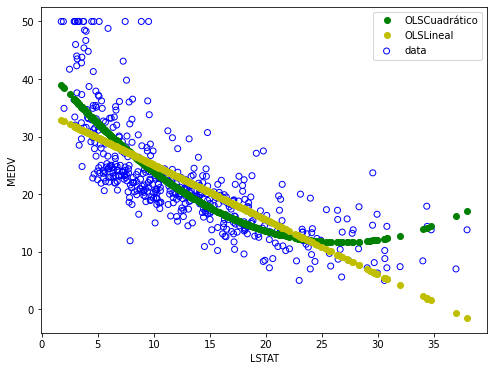

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

# Plot the data
ax.scatter(boston_df.LSTAT, boston_df.MEDV, facecolors='none', edgecolors='b', label="data");
# plot the models fitted values
ax.plot(boston_df.LSTAT, lm_fit2.fittedvalues, 'g', marker='o',linestyle='none', label="OLSCuadrático");
ax.plot(boston_df.LSTAT, lm_fit.fittedvalues, 'y', marker='o',linestyle='none', label="OLSLineal");

ax.legend(loc='best');

plt.xlabel('LSTAT');
plt.ylabel('MEDV');

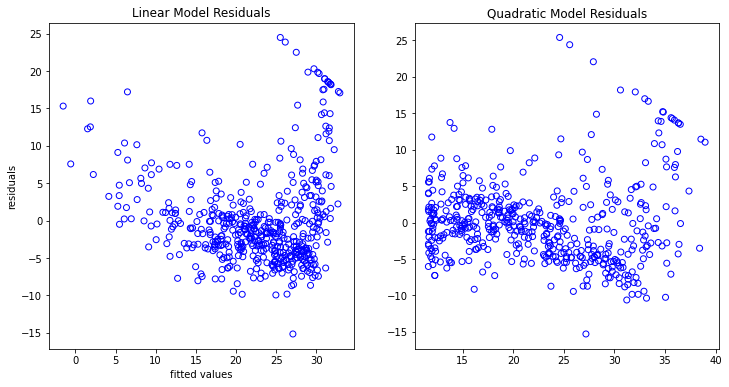

In [18]:
# Create plots of residuals
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

# Plot the residual for each fitted value for the linear model
ax1.scatter(lm_fit.fittedvalues, lm_fit.resid, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');
ax1.set_title('Linear Model Residuals')

ax2.scatter(lm_fit2.fittedvalues, lm_fit2.resid, facecolors='none', edgecolors='b');
ax2.set_title('Quadratic Model Residuals');

Para crear un ajuste cúbico, podemos incluir un predictor de la forma I(X**3). Sin embargo, este enfoque puede comenzar a hacerse más complicado para polinomios de ordenes más altos. Un mejor enfoque es el siguiente:

In [22]:
formula = 'MEDV ~ LSTAT +' + ' + '.join('I(LSTAT**{})'.format(i) for i in range(2, 6))
formula

'MEDV ~ LSTAT +I(LSTAT**2) + I(LSTAT**3) + I(LSTAT**4) + I(LSTAT**5)'

In [23]:
lm_fit5 = smf.ols(formula, boston_df).fit()
lm_fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          8.73e-122
Time:                        17:44:51   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
LSTAT           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(LSTAT ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(LSTAT ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(LSTAT ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(LSTAT ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Esto suguiere que incluir un término polinomial adicional, hasta de quinto orden, lleva a una mejora en el ajuste del modelo. Sin embargo, una investigación adicional de los datos revela que los términos polinomiales mayores al quinto orden no tienen p-valores significativos en la regresión.
Por supuesto, no hay restricción al usar transformaciones polinomiales en los predictores. Aquí probamos una transformación logarítmica.

In [24]:
smf.ols('MEDV ~ np.log(LSTAT)', boston_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          9.28e-122
Time:                        17:45:42   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predictores Cualitativos 

Ahora, examinamos los datos de Carseats. Trataremos de predecir las ventas (ventas de asientos de auto para niño) en 400 lugares con base en algunos predictores.

In [26]:
carseats_df = pd.read_csv('C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Data/Carseats.csv', index_col = 0)
#carseats_df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


La tabla Carseats incluye variables predictoras cualitativas como `ShelveLoc`, un indicador de la calidad de la estantería y el espacio de la tienda en el cual se muestra el asiento de carro. El predictor `ShelveLoc` ttoma tres posibles valores: Bad, Medium, and Good.

Cuando se le da una variable cualitativa como `Shelveloc`, `statsmodels` genera variables dummy automáticamente. Abajo, se ajusta un modelo de regresión múltiple que incluye algunos términos de interacción.

In [27]:
# Construimos la fórmula con dos términos de interacción
preds = carseats_df.columns.tolist()[1:]
formula ='Sales ~ ' + ' + '.join(preds) + ' + Income:Advertising + Price:Age'
formula

'Sales ~ CompPrice + Income + Advertising + Population + Price + ShelveLoc + Age + Education + Urban + US + Income:Advertising + Price:Age'

In [28]:
lm_fit = smf.ols(formula, carseats_df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 23 Sep 2021   Prob (F-statistic):          6.14e-166
Time:                        17:52:38   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.5756      1.009      6.519      0.000       4.592       8.559
ShelveLoc[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
ShelveLoc[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
Urban[T.Yes]            0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]              -0.1576      0.149     -1.058      0.291      -0.450       0.135
CompPrice               0.0929      0.004     22.567      0.000       0.085       0.101
Income                  0.0109      0.003      4.183      0.000       0.006       0.016
Advertising             0.0702      0.023      3.107      0.002       0.026       0.115
Population              0.0002      0.000      0.433      0.665      -0.001       0.001
Price                  -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                    -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education              -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising      0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age               0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Python crea una variable dummy [T.Good] que toma el valor 1 si la shelving location es good, y 0 en otro caso. Además crea una variable dummy ShelveLoc[T.Medium] dummy variable que es igual a 1 si la shelving location es medium, y 0 en otro caso. Una bad shelving location corresponde a cero para cada una de las dos variables dummy. El hecho de que el coeficiente para ShelveLoc[T.Good] en la salida de la regresión sea positivo indica que una good shelving location está asociada con ventas altas (en coparación con una bad location). Y ShelveLoc[T.Medium] tiene un coeficiente positivo menor, lo cual indica que una medium shelving location lleva a mayores ventas que una bad shelving location pero menores ventas que una good shelving location.

In [ ]:
# Para regresión lineal múltiple con scikitlearn puede ver: https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
